# General Assembly DSI Immersive - Data Science Code Challenge - Part1

## Submitted by Mohammed Mudassar MTech, MIE, MIET, SDS, SMIEE

#### Mobile :0532495704  Email : muhammed78692muddassir@gmail.com

In [1]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
import pandas as ps
import numpy as np
import seaborn as sbrn
import scipy
import random
import matplotlib.pyplot as mplib_pyplt
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sbrn
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as npy
import numpy.random as npy_rn
import warnings




# 1. Python Coding and Data Set

### 1.1  Adding the header to the dataset read without header

In [2]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
warnings.filterwarnings("ignore")
brst_cncr_dat = ps.read_csv("breast-cancer.csv",header=None) 
brst_cncr_col_nms = ps.read_csv('field_names.txt', sep = '\t',header=None)
brst_cncr_dat.columns= brst_cncr_col_nms[0].tolist()
brst_cncr_dat.head

<bound method NDFrame.head of            ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
0      842302         M        17.99            10.38        122.80   
1      842517         M        20.57            17.77        132.90   
2    84300903         M        19.69            21.25        130.00   
3    84348301         M        11.42            20.38         77.58   
4    84358402         M        20.29            14.34        135.10   
..        ...       ...          ...              ...           ...   
564    926424         M        21.56            22.39        142.00   
565    926682         M        20.13            28.25        131.20   
566    926954         M        16.60            28.08        108.30   
567    927241         M        20.60            29.33        140.10   
568     92751         B         7.76            24.54         47.92   

     texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
0          1001.0           0.11840        0.27

### 1.2 Data Transfrom and Evaluation

In [3]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
####Chganging the values of Diagnosis variable to 1 and zero correspondingly for Malignant and Bengin samples

brst_cncr_dat['diagnosis']= brst_cncr_dat.diagnosis.apply(lambda val: 1 if val == "M" else 0)
brst_cncr_dat.head


<bound method NDFrame.head of            ID  diagnosis  radius_mean  radius_sd_error  radius_worst  \
0      842302          1        17.99            10.38        122.80   
1      842517          1        20.57            17.77        132.90   
2    84300903          1        19.69            21.25        130.00   
3    84348301          1        11.42            20.38         77.58   
4    84358402          1        20.29            14.34        135.10   
..        ...        ...          ...              ...           ...   
564    926424          1        21.56            22.39        142.00   
565    926682          1        20.13            28.25        131.20   
566    926954          1        16.60            28.08        108.30   
567    927241          1        20.60            29.33        140.10   
568     92751          0         7.76            24.54         47.92   

     texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
0          1001.0           0.11840

In [4]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
print("Does the data set have anly null value : " + str( brst_cncr_dat.isnull().values.any()) )


#The dataset has no null values

no_of_bengintumor_samples = len(brst_cncr_dat[brst_cncr_dat.diagnosis == 0].index)
no_of_malignanttumor_samples = len(brst_cncr_dat[brst_cncr_dat.diagnosis == 1].index)
print('No of Bengin Tumor Samples : ' + str(no_of_bengintumor_samples) )
print('No of Malignant  Tumor Samples : ' + str(no_of_malignanttumor_samples) )
print('Diff bengin and Malignant Tumor Samples :' + str(no_of_bengintumor_samples- no_of_malignanttumor_samples ))

#brst_cncr_dat_withtclss= brst_cncr_dat.loc[:, brst_cncr_dat.columns != 'diagnosis']
#brst_cncr_dat_withtclss

Does the data set have anly null value : False
No of Bengin Tumor Samples : 357
No of Malignant  Tumor Samples : 212
Diff bengin and Malignant Tumor Samples :145


#The difference between bengin and nalignant tumor samples is not that high and hence the data set is not imbalanced.
#Before applying the model normalizing or standardizing the values of each column/predictorvariable can be done inorder to #nullify the effects of some of those varibles that have considerable large values and can introduce bias in the ML model.
#Normalizing a column/predictor variable involves converting the values of each column in the range o to 1
#Standardizing a column/predictor variable involves computing the z score which is the distance of a column value  
#from the mean times the standard deviation of a column/predictorvaraible


### 1.3 Comparing the Mean and Median for benign and malgnant tumors w.r.t variables/predictors  compactness and  smoothness

#### 1.3.1 Comparing the means of bengin and malignant tumors for smoothness & compactness predictors



In [5]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
#An infrential statistical hypothesis testing called t-test  is used to check if the diffrence in means 
# is merely by chance or there is significant difference

dat_smoothness_benigin = brst_cncr_dat[brst_cncr_dat.diagnosis == 0]["smoothness_mean"]
dat_smoothness_malignant= brst_cncr_dat[brst_cncr_dat.diagnosis == 1]["smoothness_mean"]
print("\nComparing the means of benigin and malignant tumors for smoothness predictor variable\n")
print("Sats for Benign samples\n" + " Mean : " + str(dat_smoothness_benigin.describe()['mean']) + " Stdev : " + str(dat_smoothness_benigin.describe()['std']) )
print("Sats for Malignant samples\n" + " Mean : " + str(dat_smoothness_malignant.describe()['mean']) + " Stdev : " + str(dat_smoothness_malignant.describe()['std'])) 
t_test_res = scipy.stats.ttest_ind(dat_smoothness_benigin,dat_smoothness_malignant,equal_var=False)
print(t_test_res)
if(t_test_res[1]< .05) :
    print("The probabilty of having the observed diff in means by chance is very less ")
    print("Hence there is a significant difference between the means of bengin and maignant samples for smoothnes predictor variable")
else : 
    print(" The diff observed between bengin and malignant samples is merely by chance ")



Comparing the means of benigin and malignant tumors for smoothness predictor variable

Sats for Benign samples
 Mean : 2.0003212885154085 Stdev : 0.7711692027100456
Sats for Malignant samples
 Mean : 4.323929245283021 Stdev : 2.5685456540541707
Ttest_indResult(statistic=-12.83276274696711, pvalue=6.868552881086801e-29)
The probabilty of having the observed diff in means by chance is very less 
Hence there is a significant difference between the means of bengin and maignant samples for smoothnes predictor variable


In [6]:

print("\n\nComparing the means of benigin and malignant tumors for compactness predictor variable\n")    
dat_compactness_benigin = brst_cncr_dat[brst_cncr_dat.diagnosis == 0]["compactness_mean"]
dat_compactness_malignant= brst_cncr_dat[brst_cncr_dat.diagnosis == 1]["compactness_mean"]

print("Sats for Benign samples\n" + " Mean : " + str(dat_compactness_benigin.describe()['mean']) + " Stdev : " + str(dat_compactness_benigin.describe()['std']) )
print("Sats for Malignant samples\n" + " Mean : " + str(dat_compactness_malignant.describe()['mean']) + " Stdev : " + str(dat_compactness_malignant.describe()['std'])) 
t_test_res = scipy.stats.ttest_ind(dat_compactness_benigin,dat_compactness_malignant,equal_var=False)
print(t_test_res)
if(t_test_res[1]< .05) :
    print("The probabilty of having the observed diff in means by chance is very less ")
    print("Hence there is a significant difference between the means of bengin and maignant samples for compactness predictor variable")
else : 
    print(" The diff observed between bengin and malignant samples is merely by chance ")



Comparing the means of benigin and malignant tumors for compactness predictor variable

Sats for Benign samples
 Mean : 0.02143824649859945 Stdev : 0.01635151136043786
Sats for Malignant samples
 Mean : 0.03228116509433961 Stdev : 0.01838718992099185
Ttest_indResult(statistic=-7.082641476498329, pvalue=6.341807077270803e-12)
The probabilty of having the observed diff in means by chance is very less 
Hence there is a significant difference between the means of bengin and maignant samples for compactness predictor variable


In [7]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
#A  non parametric test called moods test is used to test the equality of medians
print("A  non parametric test called moods test is used to test the equality of medians" )    
print("The moods test is performed with all three setups for tie values ")
print("The tie values are the values that are equal to the median")
print("The values that are equal to median are considered as above or below or ignored in the corresponding three setups")




A  non parametric test called moods test is used to test the equality of medians
The moods test is performed with all three setups for tie values 
The tie values are the values that are equal to the median
The values that are equal to median are considered as above or below or ignored in the corresponding three setups


#### 1.3.2 Comparing the meadians of bengin and malignant tumors for smoothness & compactness predictors

In [9]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
dat_smoothness_benigin = brst_cncr_dat[brst_cncr_dat.diagnosis == 0]["smoothness_mean"]
dat_smoothness_malignant= brst_cncr_dat[brst_cncr_dat.diagnosis == 1]["smoothness_mean"]
res1= scipy.stats.median_test(dat_smoothness_benigin,dat_smoothness_malignant)
res2= scipy.stats.median_test(dat_smoothness_benigin,dat_smoothness_malignant, ties = 'above')
res3= scipy.stats.median_test(dat_smoothness_benigin,dat_smoothness_malignant, ties = 'ignore')

print("\nComparing the medians for smoothness predictor variables\n" )
print("Median for Benign samples :" + str(dat_smoothness_benigin.describe()['50%']) )
print("Median for Malignant samples :" + str(dat_smoothness_malignant.describe()['50%']) )



result_string= ''
cnt=0

if( res1[1] <.05 ) :  
    print('The p value is < .05 and the diff in medians is significant for ties considered as below. Pvalue = ' + str(res1[1]) )
    cnt = cnt+1
else :
    print('The p value is > .05 and the diff in medians is not significant  for ties considered as below. Pvalue =  ' + str(res1[1]) )
    cnt = cnt+1
if( res2[1] <.05 ) :  
    print('The p value is < .05  and the diff in medians is significant for ties considered as above. Pvalue = ' + str(res2[1]) )
    cnt = cnt+1
else :
    print('The p value is > .05 and the diff in medians is not significant for ties considered as above. Pvalue =  ' + str(res2[1]) ) 
    cnt = cnt+1

if( res3[1] <.05 ) :  
    print('The p value is < .05 and the diff in medians is significant for ties ignored. Pvalue = ' + str(res3[1]) )
    cnt = cnt+1
else :
    print('The p value is > .05 and the diff in medians is not significant for ties ignored.  Pvalue =  ' + str(res3[1]) ) 
    cnt = cnt+1
    
if( cnt == 3 ):
    print( "The diff in medians for smoothness predictor variable is significantly different irrespective of the  consideration of ties as above, below or ignored " )
else:
    print( "The significance of the difference for smoothness predictor variabl varies with  consideration of ties as above below or ignored " )


Comparing the medians for smoothness predictor variables

Median for Benign samples :1.851
Median for Malignant samples :3.6795
The p value is < .05 and the diff in medians is significant for ties considered as below. Pvalue = 1.985798026355439e-36
The p value is < .05  and the diff in medians is significant for ties considered as above. Pvalue = 4.497062186904025e-36
The p value is < .05 and the diff in medians is significant for ties ignored. Pvalue = 2.7517982538670703e-36
The diff in medians for smoothness predictor variable is significantly different irrespective of the  consideration of ties as above, below or ignored 


In [8]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
dat_compactness_benigin = brst_cncr_dat[brst_cncr_dat.diagnosis == 0]["compactness_mean"]
dat_compactness_malignant= brst_cncr_dat[brst_cncr_dat.diagnosis == 1]["compactness_mean"]
res1= scipy.stats.median_test(dat_compactness_malignant,dat_compactness_benigin)
res2= scipy.stats.median_test(dat_compactness_malignant,dat_compactness_benigin, ties = 'above')
res3= scipy.stats.median_test(dat_compactness_malignant,dat_compactness_benigin, ties = 'ignore')

print("\nComparing the medians for compactness predictor variables\n" )
print("Median for Benign samples :" + str(dat_compactness_benigin.describe()['50%']) )
print("Median for Malignant samples :" + str(dat_compactness_malignant.describe()['50%']) )



result_string= ''
cnt=0

if( res1[1] <.05 ) :  
    print('The p value is < .05 and the diff in medians is significant for ties considered as below. Pvalue = ' + str(res1[1]) )
    cnt = cnt+1
else :
    print('The p value is > .05 and the diff in medians is not significant  for ties considered as below. Pvalue =  ' + str(res1[1]) )
    cnt = cnt+1
if( res2[1] <.05 ) :  
    print('The p value is < .05  and the diff in medians is significant for ties considered as above. Pvalue = ' + str(res2[1]) )
    cnt = cnt+1
else :
    print('The p value is > .05 and the diff in medians is not significant for ties considered as above. Pvalue =  ' + str(res2[1]) ) 
    cnt = cnt+1

if( res3[1] <.05 ) :  
    print('The p value is < .05 and the diff in medians is significant for ties ignored. Pvalue = ' + str(res3[1]) )
    cnt = cnt+1
else :
    print('The p value is > .05 and the diff in medians is not significant for ties ignored.  Pvalue =  ' + str(res3[1]) ) 
    cnt = cnt+1
    
if( cnt == 3 ):
    print( "The diff in medians for compactness predictor variable is significantly different irrespective of the  consideration of ties as above, below or ignored " )
else:
    print( "The significance of the difference for compactness predictor variabl varies with  consideration of ties as above below or ignored " )


Comparing the medians for compactness predictor variables

Median for Benign samples :0.016309999999999998
Median for Malignant samples :0.02859
The p value is < .05 and the diff in medians is significant for ties considered as below. Pvalue = 6.914602528857842e-18
The p value is < .05  and the diff in medians is significant for ties considered as above. Pvalue = 1.2128940119272918e-17
The p value is < .05 and the diff in medians is significant for ties ignored. Pvalue = 8.812552193709568e-18
The diff in medians for compactness predictor variable is significantly different irrespective of the  consideration of ties as above, below or ignored 


#### 1.3.3  Comparing mean and median within bengin, within malignant and in all tumors for smoothness and compactness

In [9]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
#1 Comparing mean and median within bengin and malignant tumors for smoothness and compactness
print(" The diffrence between mean and meadian of a sample is measured by kurtosis and its acceptable range is 2 to 4")
mean_smoothness_bengin = brst_cncr_dat[brst_cncr_dat.diagnosis == 0]["smoothness_mean"].describe()['mean']
median_smoothness_bengin = brst_cncr_dat[brst_cncr_dat.diagnosis == 0]["smoothness_mean"].describe()['50%']
stdev_smoothness_bengin =  brst_cncr_dat[brst_cncr_dat.diagnosis == 0]["smoothness_mean"].describe()['std']
kutosis_smothness_bengin = 3 * ((mean_smoothness_bengin-median_smoothness_bengin)/stdev_smoothness_bengin)
print(" Kurtosis of  smoothness in bengin tumor samples is " + str(kutosis_smothness_bengin))
mean_smoothness_malignant = brst_cncr_dat[brst_cncr_dat.diagnosis == 1]["smoothness_mean"].describe()['mean']
median_smoothness_malignant = brst_cncr_dat[brst_cncr_dat.diagnosis == 1]["smoothness_mean"].describe()['50%']
stdev_smoothness_malignat =  brst_cncr_dat[brst_cncr_dat.diagnosis == 1]["smoothness_mean"].describe()['std']
stdev_smoothness_malignat = 3 * ((mean_smoothness_malignant-median_smoothness_malignant)/stdev_smoothness_malignat)
print(" Kurtosis of  smoothness in malignant tumor samples is " + str(stdev_smoothness_malignat))
mean_smoothness = brst_cncr_dat["smoothness_mean"].describe()['mean']
median_smoothness = brst_cncr_dat["smoothness_mean"].describe()['50%']
stdev_smoothness =  brst_cncr_dat["smoothness_mean"].describe()['std']
kutosis_smothness_overall = 3 * ((mean_smoothness-median_smoothness)/stdev_smoothness)
print(" Kurtosis of  smoothness predictor variable considering bith benign and malignantb samples is " + str(kutosis_smothness_overall))

 The diffrence between mean and meadian of a sample is measured by kurtosis and its acceptable range is 2 to 4
 Kurtosis of  smoothness in bengin tumor samples is 0.5808892056010396
 Kurtosis of  smoothness in malignant tumor samples is 0.7526779727654747
 Kurtosis of  smoothness predictor variable considering bith benign and malignantb samples is 0.85920012231721


### 1.4. Function for bootstrap

In [10]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
#This method generates n number of bootstarpped datasets either over the entire dataset or based on each class
#Input1:in_dataframe_datset : The pandas dataframeobject that has to be bootstrapped
#Input2:size_in_percent  : percentage of rows that are to be bootstrapped from the dataframe
#Input3:no_of_bootstrapped_datsets : No of  bootstrapped datasets/dataframes that are to be generated  
#Input4:colulumn name in the dataframe in_dataframe_datset that represents a class. To be more genera; this
# could be any column with categorical data  wherin bottstrapping is odne considering each distinct value of that column
#Output : list of  dataframes wherein each dataframe represent bootstrapped sample set
def bootstrap_datafarame_ds(in_dataframe_datset, size_in_percent, no_of_bootstrapped_datsets, class_column = None):
    
    iter_list = list(i+1 for i in range(no_of_bootstrapped_datsets))
        
    class_names = ""
    if class_column != None :
        class_names = in_dataframe_datset[class_column].unique()
    
    bootstrapped_datasets= list()    
    for i in iter_list:
        if class_names != "" :    #bootstrapping based on evry class in the class column
            temp_list_dataframes =list()
            for class_name in class_names:
                #no of samples of the class with label class_name
                no_of_cls_nam_smpls_to_botstrp=  int(np.rint((size_in_percent/100)* in_dataframe_datset[in_dataframe_datset[class_column]== class_name ].shape[0] ))
                index_list = random.choices(in_dataframe_datset[in_dataframe_datset[class_column]== class_name].index, k=no_of_cls_nam_smpls_to_botstrp )
                temp_list_dataframes.append(in_dataframe_datset.iloc[index_list])
            bootstrapped_datasets.append(ps.concat(temp_list_dataframes))  #concatentae all the temp dat frames corresponding to classes
        else :
            size_of_datset= int(np.rint((size_in_percent/100)* in_dataframe_datset[in_dataframe_datset.columns[0]].count() ))
            index_list = np.random.choice(in_dataframe_datset[in_dataframe_datset.columns[0]].count(), replace = True, size = size_of_datset) 
            bootstrapped_datasets.append(in_dataframe_datset.iloc[index_list])
            

    return bootstrapped_datasets 
    


In [12]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
#Obtaining 3 bootstarp samples from breast cancer dataset without considering class column 
#wherein each bootstrapped set is 1 % of original sample set
#you could see for the respective classes accross bootastrped datasets the class distribution is not uniform 
#in terms of % of samples from orginal dataset- this unstartified bootstrapping
bstrp_res = bootstrap_datafarame_ds(brst_cncr_dat,1,3)
print(" The first bootstrapped data")
print(bstrp_res[0])
print(" The second bootstrapped data")
print(bstrp_res[1])
print(" The third bootstrapped data")
print(bstrp_res[2])

 The first bootstrapped data
         ID  diagnosis  radius_mean  radius_sd_error  radius_worst  \
42   855625          1        19.07            24.81        128.30   
479  911916          1        16.25            19.51        109.80   
125   86561          0        13.85            17.21         88.44   
323  895100          1        20.34            21.51        135.90   
354  901011          0        11.14            14.07         71.24   
392  903507          1        15.49            19.97        102.40   

     texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
42         1104.0           0.09081        0.21900         0.21070   
479         815.8           0.10260        0.18930         0.22360   
125         588.7           0.08785        0.06136         0.01420   
323        1264.0           0.11700        0.18750         0.25650   
354         384.6           0.07274        0.06064         0.04505   
392         744.7           0.11600        0.15620         0

In [13]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
#Obtaining 3 bootstarp samples from breast cancer dataset class wize  
#wherein each bootstrapped set is 1 % of original sample set
#you could see for the respective classes accross bootastrped datasets the class distribution is  uniform- 
#this bootstrapping is#basically startified for the class variable diagnosis
bstrp_res = bootstrap_datafarame_ds(brst_cncr_dat,1,3,'diagnosis')
print(" The first bootstrapped data")
print(bstrp_res[0])
print(" The second bootstrapped data")
print(bstrp_res[1])
print(" The third bootstrapped data")
print(bstrp_res[2])


 The first bootstrapped data
           ID  diagnosis  radius_mean  radius_sd_error  radius_worst  \
258    887181          1        15.66            23.20        110.20   
57     857793          1        14.71            21.59         95.55   
550    923748          0        10.86            21.48         68.51   
376    901315          0        10.57            20.22         70.15   
55   85759902          0        11.52            18.75         73.34   
519    917080          0        12.75            16.70         82.51   

     texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
258         773.5           0.11090        0.31140         0.31760   
57          656.9           0.11370        0.13650         0.12930   
550         360.5           0.07431        0.04227         0.00000   
376         338.3           0.09073        0.16600         0.22800   
55          409.0           0.09524        0.05473         0.03036   
519         493.8           0.11250        0.1

# 2 Exploratory Analysis

### 2.1 Finding 3 best features predictive of malignant tumors

Feature perimeter_sd_error: 861.676020
Feature concave_points_sd_error: 897.944219
Feature fractal_dimension_mean: 964.385393


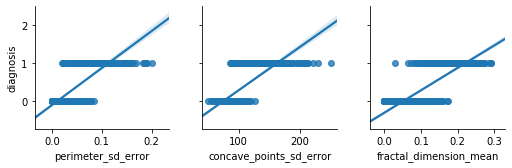

In [14]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
#Leveraging mere visulaization for identifying best features through  pair plot by capturing
#the interaction of all the featutres with class variable predictor would  highlight only
#the extent of class seprability w.r.t a particular feature. It is difficult for a
#human eye to judge among 30 odd features based on visual plots which fetaures are the best
#To truly asses the top  2 to 3 features that are predictive of malignant tumors 
#or in other words features that have good potential to discern between malignant and benign tumors
#a rigrous analysis is essential.In the scenario with a numeric variable and a categorical variable 
#Annova F score aids in quantifying the predictability of the feature. Higher the F-Score better the feature
#F-Score captures the ratio between within class varaibility and between classes variability

brst_cncr_dat_cls= brst_cncr_dat['diagnosis']
brst_cncr_dat_X = brst_cncr_dat.loc[:, brst_cncr_dat.columns != 'diagnosis']
#Create a feature selector model based on fscore
ftrsel_fScr_mdl = SelectKBest(score_func=f_classif, k=3)
#fit the modle on tarianing data for capturing relatioship btwn ftrs and cls
ftrsel_fScr_mdl.fit(brst_cncr_dat_X,brst_cncr_dat_cls )
#obtain the top k features based on fscore
k_sel_ftrs= brst_cncr_dat_X.columns[ftrsel_fScr_mdl.get_support()]
scores_k_sel_ftrs_= ftrsel_fScr_mdl.scores_[ftrsel_fScr_mdl.get_support()]

for i in range(len(k_sel_ftrs) ):
     print('Feature %s: %f' % (k_sel_ftrs[i], scores_k_sel_ftrs_[i]))
        
pp = sbrn.pairplot(data=brst_cncr_dat,y_vars=['diagnosis'], x_vars=k_sel_ftrs, kind='reg')
    


# 3 Modelling

In [15]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
def Build_Suprvsd_Mdl(in_dat_ftrs,in_dat_cls,in_alg,in_k_cv,in_rpt_k_cv,trnsfrm=None,ftrsel=None):
    crs_vld_dsets = RepeatedStratifiedKFold(n_splits=in_k_cv, n_repeats=in_rpt_k_cv, random_state=1)
    # instantiate select k best feature selector wih f score as the score function
    #instantiate a linear regression model
    if   in_alg == 'log_reg':
        Algorithm= 'Log_Reg'
        sup_mdl = LogisticRegression(max_iter = 1000)        
    elif in_alg == 'dec_tr':
        Algorithm= 'Dec_Tr'
        sup_mdl = DecisionTreeClassifier()
    elif in_alg == 'gau_n_bys':
        Algorithm= 'Gau_Nav_Bys'
        sup_mdl = GaussianNB()        
    elif in_alg == 'knn':
        Algorithm= 'K_Nrst_Nbrs'
        sup_mdl = KNeighborsClassifier(n_neighbors=5)
    elif in_alg == 'svm_ln':
        Algorithm= 'SVM_Lnr'
        sup_mdl =  SVC(kernel="linear", C=0.025)     
    elif in_alg == 'svm_rbf':
        Algorithm= 'SVM_RBF'
        sup_mdl =   SVC(gamma=2, C=1)
    elif in_alg == 'gau_prc':
        Algorithm= 'Gaus_Prs'
        sup_mdl =   GaussianProcessClassifier(kernel=1 * RBF(1), optimizer=None)
    elif in_alg == 'neu_net':
        Algorithm= 'Neu_Net'
        sup_mdl =  MLPClassifier(solver='adam', alpha=.000001,hidden_layer_sizes=(5,5), random_state=1)
    elif in_alg == 'qud_dsca':
        Algorithm= 'Quad_Dscr_Ana'
        sup_mdl =  QuadraticDiscriminantAnalysis()                                   
    elif in_alg == 'ada_bst':
        Algorithm= 'Ada_Bst'
        sup_mdl =  AdaBoostClassifier()                             
    elif in_alg == 'ran_fst':
        Algorithm= 'Ran_Frst'
        sup_mdl = RandomForestClassifier()
    elif in_alg == 'XG_Bst':
        Algorithm= 'XG_Bst'
        sup_mdl = XGBClassifier()
          
    
            
    ftrsel_fScr_mdl = SelectKBest(score_func = f_classif)    
    if trnsfrm == None :
        # set up the pipeline with annova fa score computation followed by classification using chosen supervised classifier model 
        pip_ln_exectr = Pipeline(steps=[('anova', ftrsel_fScr_mdl), (in_alg, sup_mdl)])
    else :
        #include pca in pipeline after scaling the data
        pip_ln_exectr = Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA()),(in_alg, sup_mdl)])
       
    #define the grid to use up to the max no. of features as the `k` value for `SelectKBest`
    param_grid = {}
      
    if  trnsfrm != None :
         #search principal components  when it is  pca transform  for pca feature selection is always imposed
        param_grid['pca__n_components'] = [i+1 for i in range(in_dat_ftrs.shape[1])]     
    elif ftrsel != None :
        #search features only when feature selectors is not none
        param_grid['anova__k'] = [i+1 for i in range(in_dat_ftrs.shape[1])] 
    else :
        param_grid['anova__k'] = [i for i in [in_dat_ftrs.shape[1]]]
        
    # define the grid search
    search = GridSearchCV(pip_ln_exectr, param_grid, scoring='accuracy', n_jobs=-1, cv=crs_vld_dsets)
    # perform the search
    results = search.fit(in_dat_ftrs, in_dat_cls)
    
    # summarize best score
    #if trnsfrm == None :
     #   print("The results obtained using  ", Algorithm)
    #else :
     #   print("The results obtained using  ", Algorithm, " after appling PCA")

    #print('Best Mean Accuracy: %.3f' % results.best_score_)
    #print('Best No of Features: %s' % results.best_params_)
    if trnsfrm == None and ftrsel != None :
        selected_features= ps.Series(results.cv_results_['rank_test_score']).apply(lambda val: True if val <= results.best_params_['anova__k'] else False)
        no_of_bestfeatures= len(selected_features[selected_features == True])
       # print('The ',no_of_bestfeatures, ' features that gives best mean accuracy on', in_k_cv ,'fold strtified cross validated data  are' )
       # print(in_dat_ftrs.columns[selected_features] )
    elif  trnsfrm != None :
        no_of_bestfeatures =  results.best_params_['pca__n_components']
    else :
        no_of_bestfeatures = in_dat_ftrs.shape[1]
       
    
    result_list = list()
    result_list.append(Algorithm) 
    result_list.append(results.best_score_) 
    result_list.append(no_of_bestfeatures) 
    if trnsfrm == None and ftrsel != None :
        #these are the feature names of features selected by Annova Fscore
        result_list.append(in_dat_ftrs.columns[selected_features]) 
        
    return result_list


#### Every supervised classification scheme/algo is tested in 2 modes  with or without  feature selection with feature selection also includes PCA

In [16]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
def Apply_SupervisedClsfr_In3Modes(Supervised_Classifier,in_dat_fts,in_dat_cls,Algorithm_Used,Accurcy_With_All_Ftrs,
     No_of_Ftrs,Bst_Accurcy_With_Ftrs_by_AnovaFscr, No_of_Bst_Ftrs_Sel_by_AnovaFscr,
    Bst_Accurcy_With_Ftrs_using_PCA,No_of_Bst_Ftrs_Sel_by_PCA,Ftrs_Sel_by_AnovaFscr ):
    reslt= Build_Suprvsd_Mdl(in_dat_fts,in_dat_cls,Supervised_Classifier,10,10)
    Algorithm_Used.append(reslt[0])
    
    print("Testing ",Supervised_Classifier )
    Accurcy_With_All_Ftrs.append(reslt[1])
    No_of_Ftrs.append(reslt[2])
    reslt= Build_Suprvsd_Mdl(in_dat_fts,in_dat_cls,Supervised_Classifier,10,10,None,'SelectFeatures_by_AnnovaFScore')
    Bst_Accurcy_With_Ftrs_by_AnovaFscr.append(reslt[1])
    No_of_Bst_Ftrs_Sel_by_AnovaFscr.append(reslt[2])
    Ftrs_Sel_by_AnovaFscr.append(reslt[3])
    reslt= Build_Suprvsd_Mdl(in_dat_fts,in_dat_cls,Supervised_Classifier,10,10,'DoPCA')
    Bst_Accurcy_With_Ftrs_using_PCA.append(reslt[1])
    No_of_Bst_Ftrs_Sel_by_PCA.append(reslt[2])

In [17]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
def Test_Suprvised_Learning_Model(in_dat_Ftrs,in_dat_cls ):
    
    #Ecah algorithm tested in  3 mode  all features, using best no of pca features 
    #and best no of features selected based on annova f score
    #10 fold stratified cross validation with 10 reptitions is applied to obtain mean accuracy score
    #the important factors to detrmine the potential of an algo are the mean accuracy and no of features
    #higher accuracy with lesser number of features is always the goal
    Algorithm_Used = list()
    Accurcy_With_All_Ftrs = list()
    No_of_Ftrs = list()
    Bst_Accurcy_With_Ftrs_by_AnovaFscr= list()
    No_of_Bst_Ftrs_Sel_by_AnovaFscr=list()
    Ftrs_Sel_by_AnovaFscr=list()    
    Bst_Accurcy_With_Ftrs_using_PCA= list()
    No_of_Bst_Ftrs_Sel_by_PCA=list()
       
    #---KNN  
    Apply_SupervisedClsfr_In3Modes('knn',in_dat_Ftrs,in_dat_cls,Algorithm_Used,Accurcy_With_All_Ftrs,
    No_of_Ftrs,Bst_Accurcy_With_Ftrs_by_AnovaFscr, No_of_Bst_Ftrs_Sel_by_AnovaFscr,
    Bst_Accurcy_With_Ftrs_using_PCA,No_of_Bst_Ftrs_Sel_by_PCA,Ftrs_Sel_by_AnovaFscr )
    #--- logistic regression 
    Apply_SupervisedClsfr_In3Modes('log_reg',in_dat_Ftrs,in_dat_cls,Algorithm_Used,Accurcy_With_All_Ftrs,
    No_of_Ftrs,Bst_Accurcy_With_Ftrs_by_AnovaFscr, No_of_Bst_Ftrs_Sel_by_AnovaFscr,
    Bst_Accurcy_With_Ftrs_using_PCA,No_of_Bst_Ftrs_Sel_by_PCA,Ftrs_Sel_by_AnovaFscr )
    
    Apply_SupervisedClsfr_In3Modes('dec_tr',in_dat_Ftrs,in_dat_cls,Algorithm_Used,Accurcy_With_All_Ftrs,
    No_of_Ftrs,Bst_Accurcy_With_Ftrs_by_AnovaFscr, No_of_Bst_Ftrs_Sel_by_AnovaFscr,
    Bst_Accurcy_With_Ftrs_using_PCA,No_of_Bst_Ftrs_Sel_by_PCA,Ftrs_Sel_by_AnovaFscr )
   
        
    #Quadratic Discriminat Analaysis
    Apply_SupervisedClsfr_In3Modes('qud_dsca',in_dat_Ftrs,in_dat_cls,Algorithm_Used,Accurcy_With_All_Ftrs,
    No_of_Ftrs,Bst_Accurcy_With_Ftrs_by_AnovaFscr, No_of_Bst_Ftrs_Sel_by_AnovaFscr,
    Bst_Accurcy_With_Ftrs_using_PCA,No_of_Bst_Ftrs_Sel_by_PCA,Ftrs_Sel_by_AnovaFscr )
    
    #Gaussian Naive Bayes
    Apply_SupervisedClsfr_In3Modes('gau_n_bys',in_dat_Ftrs,in_dat_cls,Algorithm_Used,Accurcy_With_All_Ftrs,
    No_of_Ftrs,Bst_Accurcy_With_Ftrs_by_AnovaFscr, No_of_Bst_Ftrs_Sel_by_AnovaFscr,
    Bst_Accurcy_With_Ftrs_using_PCA,No_of_Bst_Ftrs_Sel_by_PCA,Ftrs_Sel_by_AnovaFscr ) 
            
    #Random Forest
    Apply_SupervisedClsfr_In3Modes('ran_fst',in_dat_Ftrs,in_dat_cls,Algorithm_Used,Accurcy_With_All_Ftrs,
    No_of_Ftrs,Bst_Accurcy_With_Ftrs_by_AnovaFscr, No_of_Bst_Ftrs_Sel_by_AnovaFscr,
    Bst_Accurcy_With_Ftrs_using_PCA,No_of_Bst_Ftrs_Sel_by_PCA,Ftrs_Sel_by_AnovaFscr )  
      
    #Ada Boost
    Apply_SupervisedClsfr_In3Modes('ada_bst',in_dat_Ftrs,in_dat_cls,Algorithm_Used,Accurcy_With_All_Ftrs,
    No_of_Ftrs,Bst_Accurcy_With_Ftrs_by_AnovaFscr, No_of_Bst_Ftrs_Sel_by_AnovaFscr,
    Bst_Accurcy_With_Ftrs_using_PCA,No_of_Bst_Ftrs_Sel_by_PCA,Ftrs_Sel_by_AnovaFscr )  

    #XG Boost
    Apply_SupervisedClsfr_In3Modes('XG_Bst',in_dat_Ftrs,in_dat_cls,Algorithm_Used,Accurcy_With_All_Ftrs,
    No_of_Ftrs,Bst_Accurcy_With_Ftrs_by_AnovaFscr, No_of_Bst_Ftrs_Sel_by_AnovaFscr,
    Bst_Accurcy_With_Ftrs_using_PCA,No_of_Bst_Ftrs_Sel_by_PCA,Ftrs_Sel_by_AnovaFscr ) 
    
    #Neural Network
    Apply_SupervisedClsfr_In3Modes('neu_net',in_dat_Ftrs,in_dat_cls,Algorithm_Used,Accurcy_With_All_Ftrs,
    No_of_Ftrs,Bst_Accurcy_With_Ftrs_by_AnovaFscr, No_of_Bst_Ftrs_Sel_by_AnovaFscr,
    Bst_Accurcy_With_Ftrs_using_PCA,No_of_Bst_Ftrs_Sel_by_PCA,Ftrs_Sel_by_AnovaFscr ) 
    
    
   
    result_table = ps.DataFrame() 
    result_table['Clsf'] = Algorithm_Used
    result_table['Acr_All'] = Accurcy_With_All_Ftrs
    result_table['#Ftrs'] = No_of_Ftrs
    result_table['Acr_Anv_Fscr'] = Bst_Accurcy_With_Ftrs_by_AnovaFscr
    result_table['#Ftr_Anv_Fscr'] = No_of_Bst_Ftrs_Sel_by_AnovaFscr
    result_table['Acr_PCA'] = Bst_Accurcy_With_Ftrs_using_PCA
    result_table['#Ftr_PCA'] = No_of_Bst_Ftrs_Sel_by_PCA
    result_table['Ftr_Anv'] = Ftrs_Sel_by_AnovaFscr
    #print(result_table)
    
    
    return result_table
    
    

In [18]:
res_table = Test_Suprvised_Learning_Model(brst_cncr_dat_X,brst_cncr_dat_cls )
print(res_table)

Testing  knn
Testing  log_reg
Testing  dec_tr
Testing  qud_dsca
Testing  gau_n_bys
Testing  ran_fst
Testing  ada_bst
Testing  XG_Bst
Testing  neu_net
            Clsf   Acr_All  #Ftrs  Acr_Anv_Fscr  #Ftr_Anv_Fscr   Acr_PCA  \
0    K_Nrst_Nbrs  0.773111     31      0.930931             17  0.970123   
1        Log_Reg  0.474868     31      0.952548             18  0.979789   
2         Dec_Tr  0.928822     31      0.935501             16  0.933216   
3  Quad_Dscr_Ana  0.955536     31      0.958875             29  0.963269   
4    Gau_Nav_Bys  0.624780     31      0.942882              4  0.928998   
5       Ran_Frst  0.959930     31      0.959754             20  0.955185   
6        Ada_Bst  0.968893     31      0.969772             28  0.967311   
7         XG_Bst  0.969947     31      0.971002             28  0.966081   
8        Neu_Net  0.372583     31      0.930931             16  0.975571   

   #Ftr_PCA                                            Ftr_Anv  
0        18  Index(['per

Nine different supervised classifier algorithms have been used as listed in the table above. The approach has been holistic, and overfitting is largely prevented by rigorous cross validation that involves 10 folds repeated 10 times and feature selection. The specific details of every algorithm have not been dealt to maintain simplicity of the models and given the fact that the default model settings of sk learn have been carefully set. The features for a given model is chosen by two methods- Annova F-score and PCA. In both the methods the best number of features giving best mean accuracy on the cross validated data set is chosen. This approach demonstrates the impact of right set of features over the model performance. 



In [19]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
def autolabel(rects,ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [20]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
# set width of bar
def drawAcrsyChart( ):
    barWidth = 1
    ps.options.display.float_format = '{:.2f}'.format
# set height of bar
    bars1 = round(res_table['Acr_All'],2)
    bars2 = round(res_table['Acr_Anv_Fscr'],2)
    bars3 = round(res_table['Acr_PCA'],2)
 
    # Set position of bar on X axis
    r1 = np.arange(4,(len(bars1)+1) *4,4)
    #r1=  [r + barWidth for r in range(len(bars1))]
    r2 = [x + barWidth for x in r1]
    r3 = [x+ barWidth for x in r2]
 
    fig, ax = plt.subplots(figsize=(20,10))
   
    
    # Make the plot
    rects1= plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white',  label='All Ftrs')
    rects2= plt.bar(r2, bars2, color='#FFC222', width=barWidth, edgecolor='white',  label='Anva Ftrs')
    rects3= plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white',  label='Pca Ftrs')

    autolabel(rects1,ax)
    autolabel(rects2,ax)
    autolabel(rects3,ax) 
    # Add xticks on the middle of the group bars
    plt.xlabel('Classifier', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], ['KNN', 'LR', 'DT', 'QDA', 'GNB','RF','AB','XB','NN'])
    plt.xticks(np.arange(4,(len(bars1)+1) *4,4), ['KNN', 'LR', 'DT', 'QDA', 'GNB','RF','AB','XB','NN']) 
    print('KNN:','K Nearest Neighbors' )  
    print('LR:','Logistic Regression' ) 
    print('DT:','Decision Tree' ) 
    print('QDA:','Quadratic Discriminant Analysis' ) 
    print('GNB:','Gaussian Naive Bayes' ) 
    print('RF:','Random Forest' ) 
    print('AB:','Ada Boost' ) 
    print('XB:','XG Boost' ) 
    print('NN:','Neural Network' ) 
    ax.set_ylabel('Accuracy')

    plt.ylim([0,1.5])
    # Create legend & Show graphic
    plt.legend()
    plt.show()


In [21]:
#Author: Mohammed Mudassar MTech MIE MIET SDS SMIEEE
# set width of bar
def drawNoFtrsChart( ):
    barWidth = 1
   
    # set height of bar
    bars1 = res_table['#Ftrs']
    bars2 = res_table['#Ftr_Anv_Fscr']
    bars3 = res_table['#Ftr_PCA']
 
    # Set position of bar on X axis
    r1 = np.arange(4,(len(bars1)+1) *4,4)
    #r1=  [r + barWidth for r in range(len(bars1))]
    r2 = [x + barWidth for x in r1]
    r3 = [x+ barWidth for x in r2]
 
    fig, ax = plt.subplots(figsize=(20,10))
   
    
    # Make the plot
    rects1= plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white',  label='All Ftrs')
    rects2= plt.bar(r2, bars2, color='#FFC222', width=barWidth, edgecolor='white',  label='Anva Ftrs')
    rects3= plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white',  label='Pca Ftrs')

    autolabel(rects1,ax)
    autolabel(rects2,ax)
    autolabel(rects3,ax) 
    # Add xticks on the middle of the group bars
    plt.xlabel('Classifier', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], ['KNN', 'LR', 'DT', 'QDA', 'GNB','RF','AB','XB','NN'])
    plt.xticks(np.arange(4,(len(bars1)+1) *4,4), ['KNN', 'LR', 'DT', 'QDA', 'GNB','RF','AB','XB','NN']) 
   
    ax.set_ylabel('No of Features')

    plt.ylim([0,35])
    # Create legend & Show graphic
    plt.legend()
    plt.show()


# 4. Explanation

KNN: K Nearest Neighbors
LR: Logistic Regression
DT: Decision Tree
QDA: Quadratic Discriminant Analysis
GNB: Gaussian Naive Bayes
RF: Random Forest
AB: Ada Boost
XB: XG Boost
NN: Neural Network


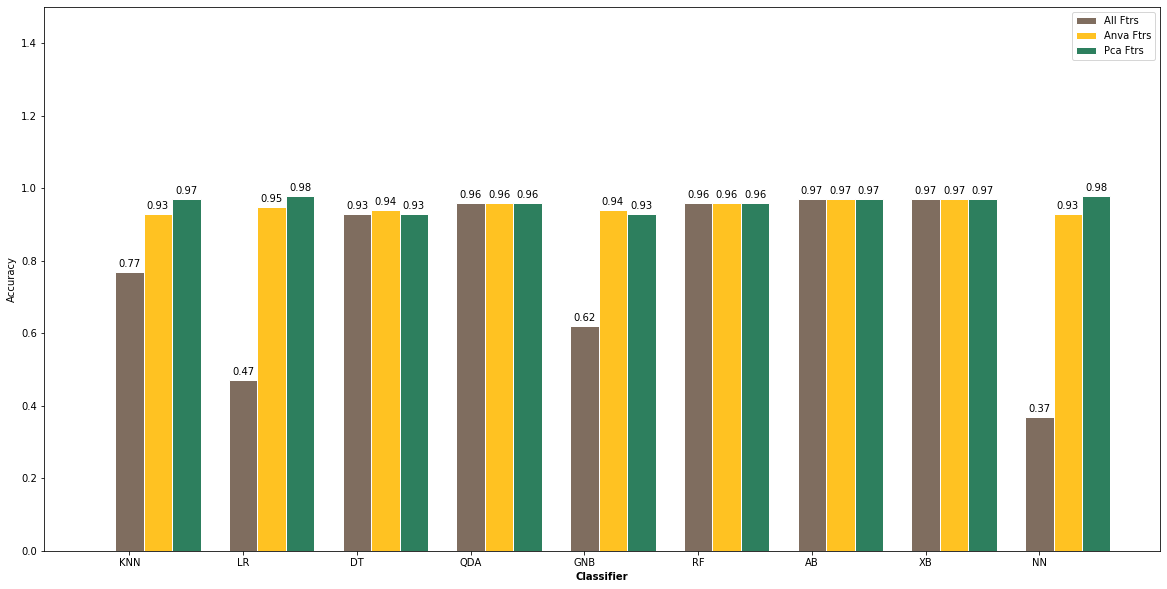

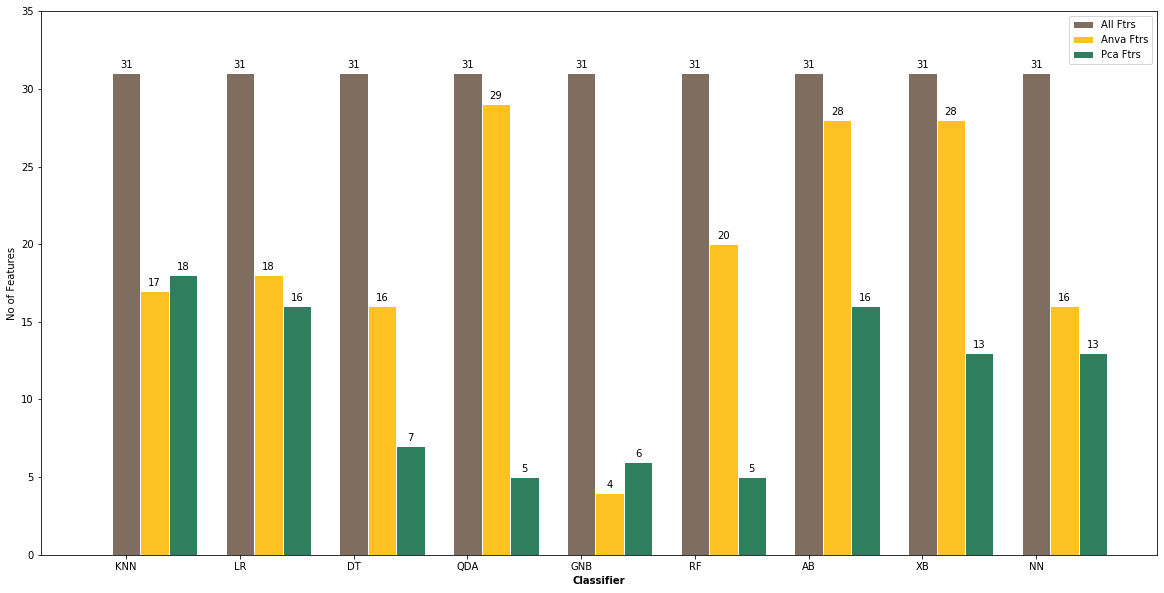

In [22]:
drawAcrsyChart()
drawNoFtrsChart()

### 4.1 Technical Audience

The approach for model selection has been generic and the specific details of the individual algorithms to fine tune /optimize the performance, have not been dealt. The current approach provides some models with very god accuracy that can be further investigated and fine-tuned - logistic regression with PCA -98% accuracy, neural network with PCA -98% accuracy, ADA Boost and Xboost with PCA -97 % accuracy. 10-fold repeated 10 times cross validation scheme has been used and therefore the accuracy figures are quite reliable. In general, further fine tuning of all the 9 algorithms can be done considering algorithmic specific details like for e.g. max depth in decision tree. The goal of fine tuning would not be only to improve accuracy but also to obtain good score for other measures like AUC, specificity, precision etc along with right balance between bias and variance.  It can be seen that PCA is quite promising on this data set and gives an accuracy of 95 % plus in most cases and 90% plus in all cases. Furthermore with PCA the number of features i,e the dimensionality of the model is reduced by more than 50 % in most of the cases. The cross-validation scheme adopted, and the best features selected through annova F-score or PCA largely control overfitting in all the models.

Plethora of classification algorithms and largely each algorithm with humongous combinations of various parameters providing a huge space of potential decision surfaces to be leveraged in classification. Which among those is a true decision surface- does a true decision surface exist among them. A true decision surface is the one that never fails and provides 100 % results forever. Are we there?  http://bit.ly/TrueDecisionSurface_A_Mystery




### 4.2 Non Technical Audience 

The problem addressed here involves discerning between benign and malignant tumours given 31 different tumour measurements.  The given breast cancer dataset has 569 total samples - 357 benign and 212 malignant, thus there is not much difference between both the classes (benign and malignant), indicating that the dataset is quite balanced. Nine different algorithms/methods were tested and the best accuracy of 98 % is achieved with algorithms logistic regression with PCA and neural network with PCA. For each classifier, the accuracy is computed in 3 modes - by using all 31 features, features selected by Anova Fscore and Features selected by PCA. Identifying the right number of features is vital for the performance of a classifier and towards these two methods called Annova Fscore and PCA are used. Annova Fscore provides the quality of the feature in terms of its discerning ability between malignant and benign tumours. Higher the score better the feature. PCA transforms the original features into what is called as principal l components and each component is a representation of all the features. The first principal component represents all the features to the maximum extent, the second component lesser than first and so on. PCA transformations eliminates ambiguous/similar features and a new clear representation of features is obtained in a transformed space. The final feature selection is done by splitting the given data into train and test samples and the best number of features by PCA or Annova Fscore that gives best accuracy on test samples are chosen. The two figures above display the results obtained. The first figure plots the accuracy for each of the algorithm used and the figure below it displays the number of features selected for each of the algorithms.